In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("AnxietyAttack.csv")

In [4]:
data.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [5]:
data.shape

(12000, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [7]:
data.describe()

,ID,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.00000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,40.96675,6.482650,5.030892,246.696083,9.492833,5.462250,119.398500,25.462333,2.987417,4.518417,5.497333,5.507583
std,3464.24595,13.47328,2.014885,2.889000,144.487071,5.769364,2.897201,34.806711,8.090686,1.414482,2.866010,2.867579,2.858663
min,1.00000,18.00000,3.000000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,3000.75000,29.00000,4.800000,2.500000,122.000000,5.000000,3.000000,89.000000,18.000000,2.000000,2.000000,3.000000,3.000000
50%,6000.50000,41.00000,6.500000,5.000000,244.000000,9.000000,5.000000,119.000000,25.000000,3.000000,5.000000,5.000000,6.000000
75%,9000.25000,53.00000,8.200000,7.525000,371.000000,15.000000,8.000000,149.000000,32.000000,4.000000,7.000000,8.000000,8.000000
max,12000.00000,64.00000,10.000000,10.000000,499.000000,19.000000,10.000000,179.000000,39.000000,5.000000,9.000000,10.000000,10.000000


In [8]:
data.isnull().sum()

ID                                   0
Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm during attack)       0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Severity of Anxiety Attack (1-10)    0
dtype: int64

In [9]:
data.drop(["ID"],axis=1,inplace=True)

In [10]:
data.dtypes

Age                                    int64
Gender                                object
Occupation                            object
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                               object
Family History of Anxiety             object
Stress Level (1-10)                    int64
Heart Rate (bpm during attack)         int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                             object
Medication                            object
Therapy Sessions (per month)           int64
Recent Major Life Event               object
Diet Quality (1-10)                    int64
Severity of Anxiety Attack (1-10)      int64
dtype: object

In [11]:
label = LabelEncoder()

In [12]:
columns = data[["Recent Major Life Event","Medication","Dizziness","Family History of Anxiety","Smoking","Occupation","Gender","Physical Activity (hrs/week)"]]

In [13]:
for i in columns:
    data[i] = label.fit_transform(data[i])

In [14]:
data.dtypes

Age                                    int64
Gender                                 int64
Occupation                             int64
Sleep Hours                          float64
Physical Activity (hrs/week)           int64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                                int64
Family History of Anxiety              int64
Stress Level (1-10)                    int64
Heart Rate (bpm during attack)         int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                              int64
Medication                             int64
Therapy Sessions (per month)           int64
Recent Major Life Event                int64
Diet Quality (1-10)                    int64
Severity of Anxiety Attack (1-10)      int64
dtype: object

In [15]:
X = data.drop(["Severity of Anxiety Attack (1-10)"],axis=1)

In [16]:
y = data["Severity of Anxiety Attack (1-10)"]

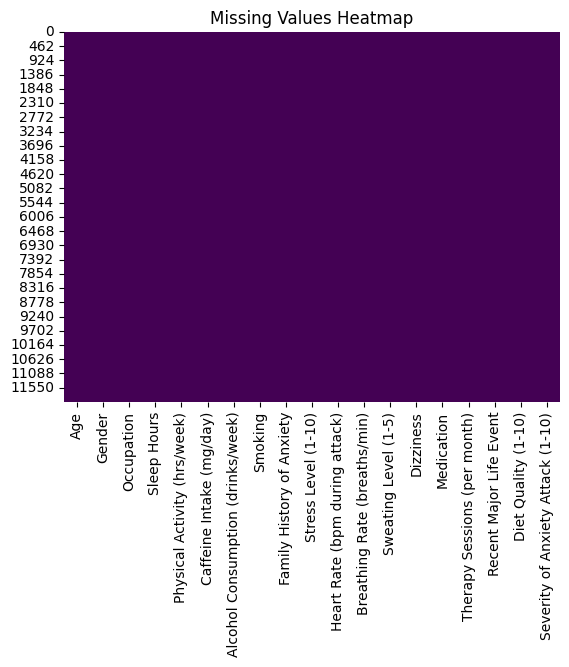

In [17]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

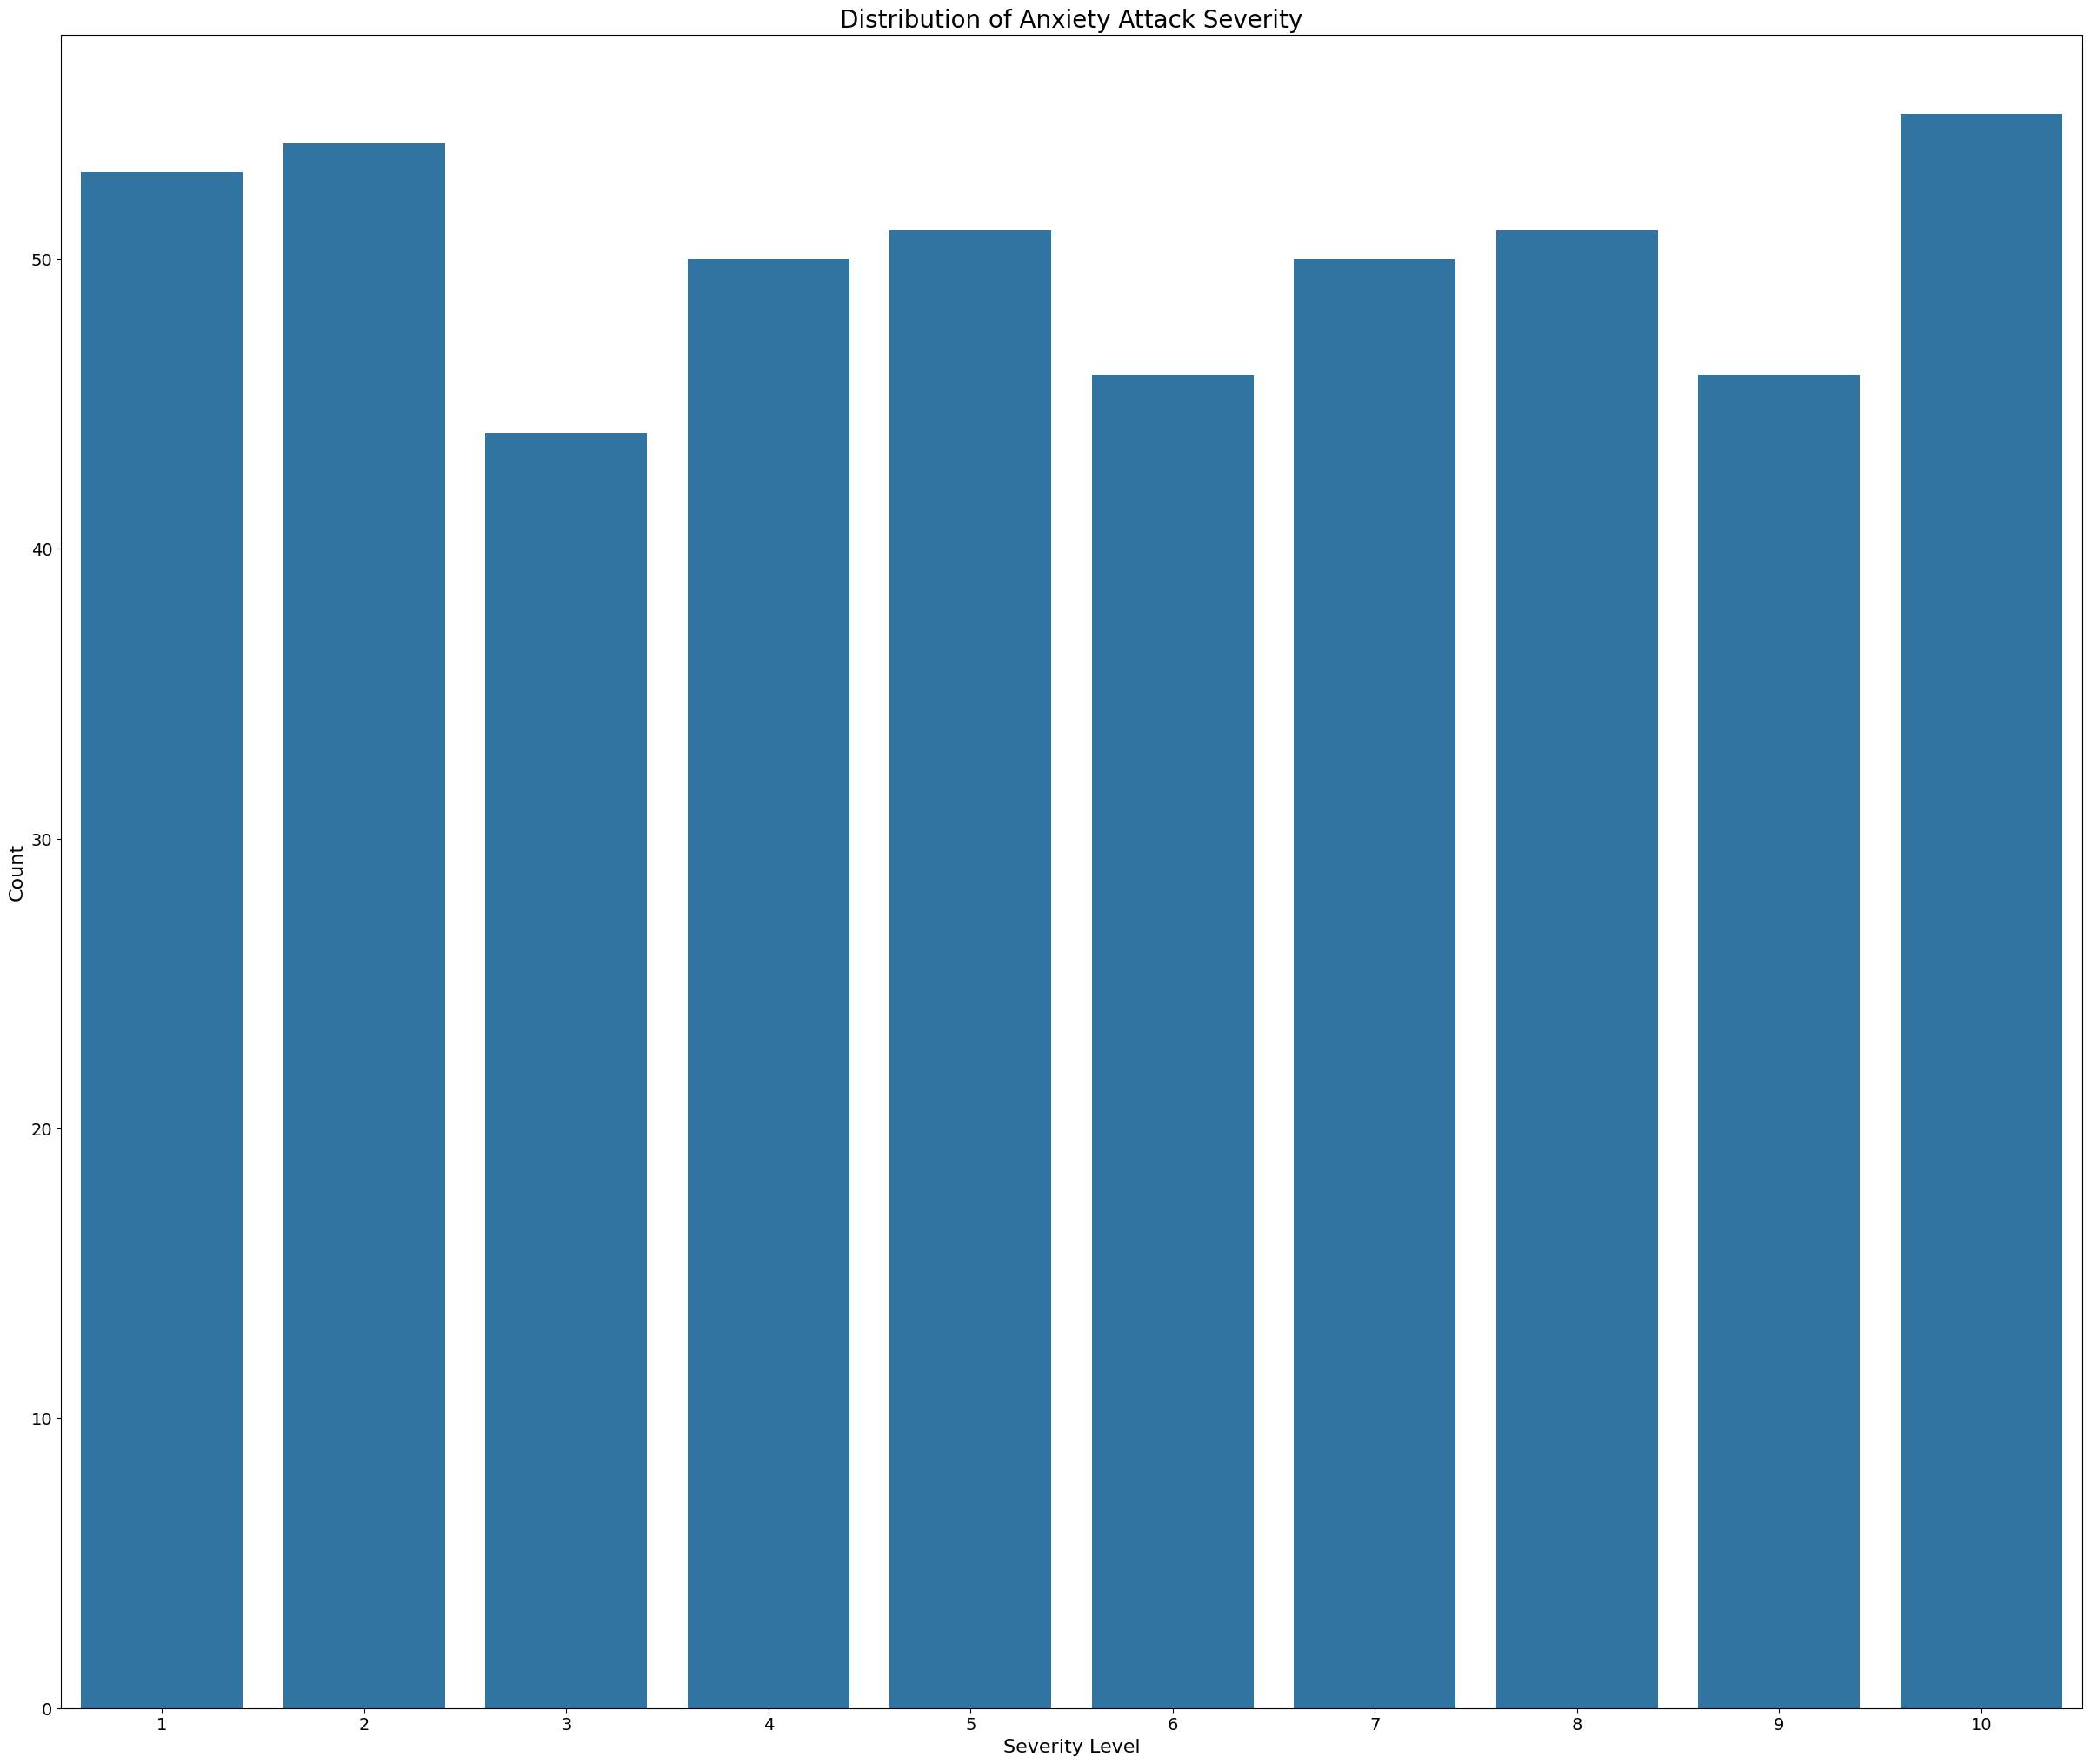

In [17]:
plt.figure(figsize=(30, 25))
sns.countplot(x="Severity of Anxiety Attack (1-10)", data=data[:500])
plt.title("Distribution of Anxiety Attack Severity", fontsize=20)
plt.xlabel("Severity Level", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

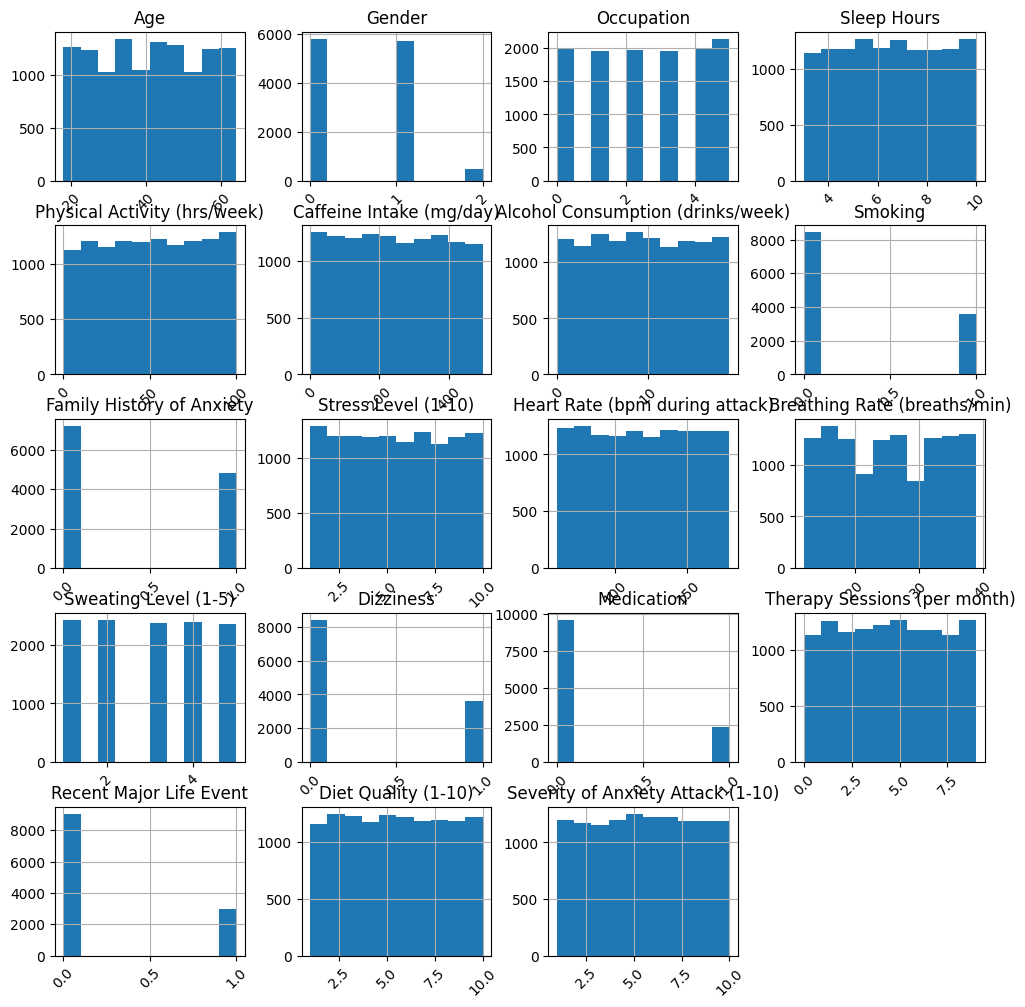

In [18]:
data.hist(xrot=45, figsize=(12,12))
plt.show()

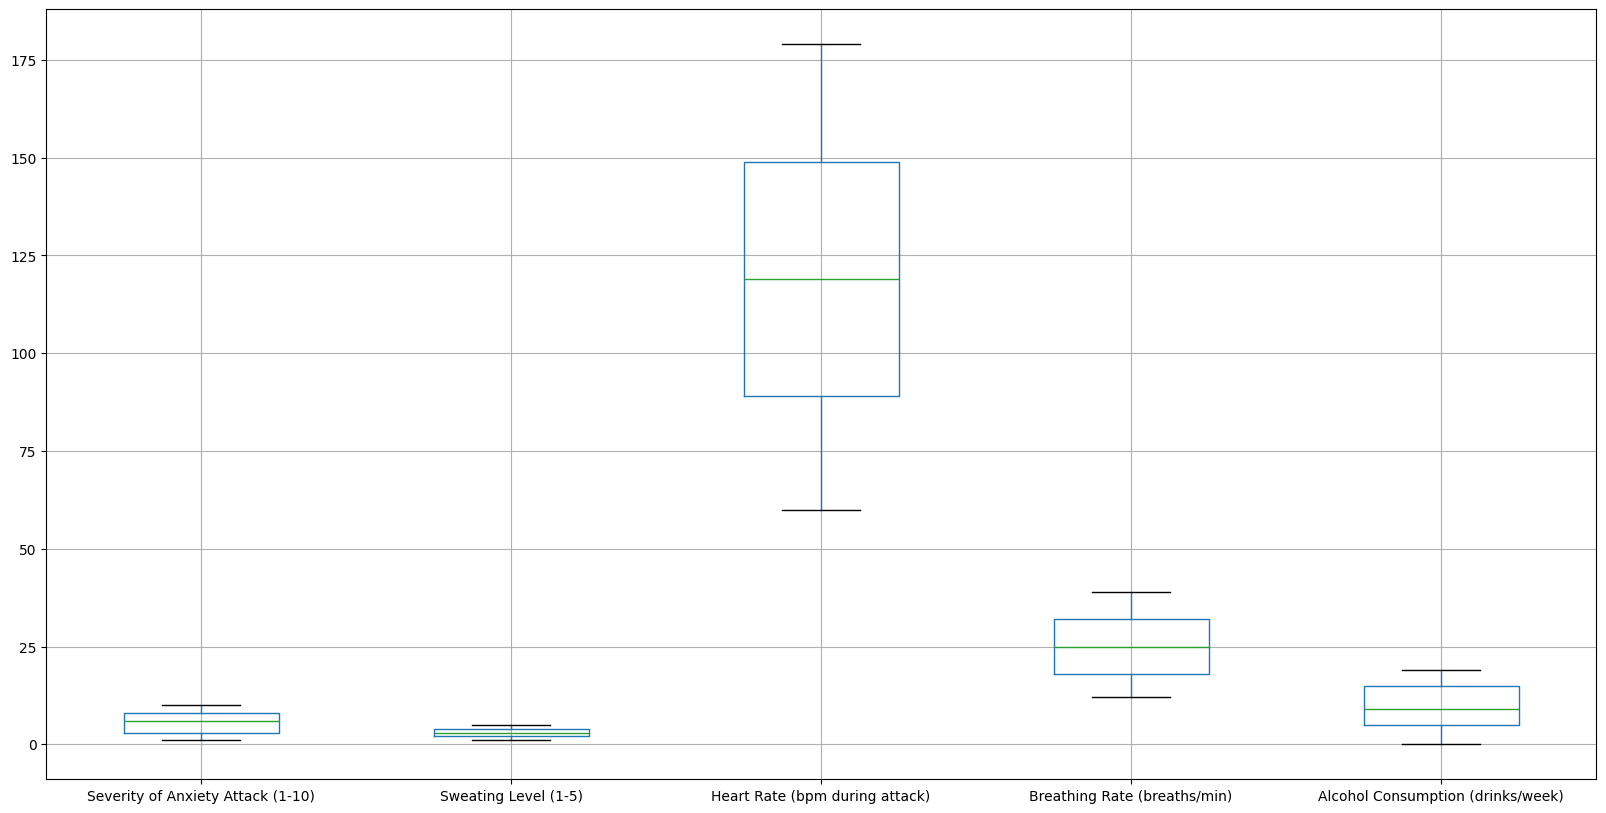

In [19]:
boxplot = data.boxplot(column=[
    "Severity of Anxiety Attack (1-10)",
    "Sweating Level (1-5)",
    "Heart Rate (bpm during attack)", 
    "Breathing Rate (breaths/min)",
    "Alcohol Consumption (drinks/week)"
])

fig = plt.gcf()
fig.set_size_inches(20, 10)

plt.show() 

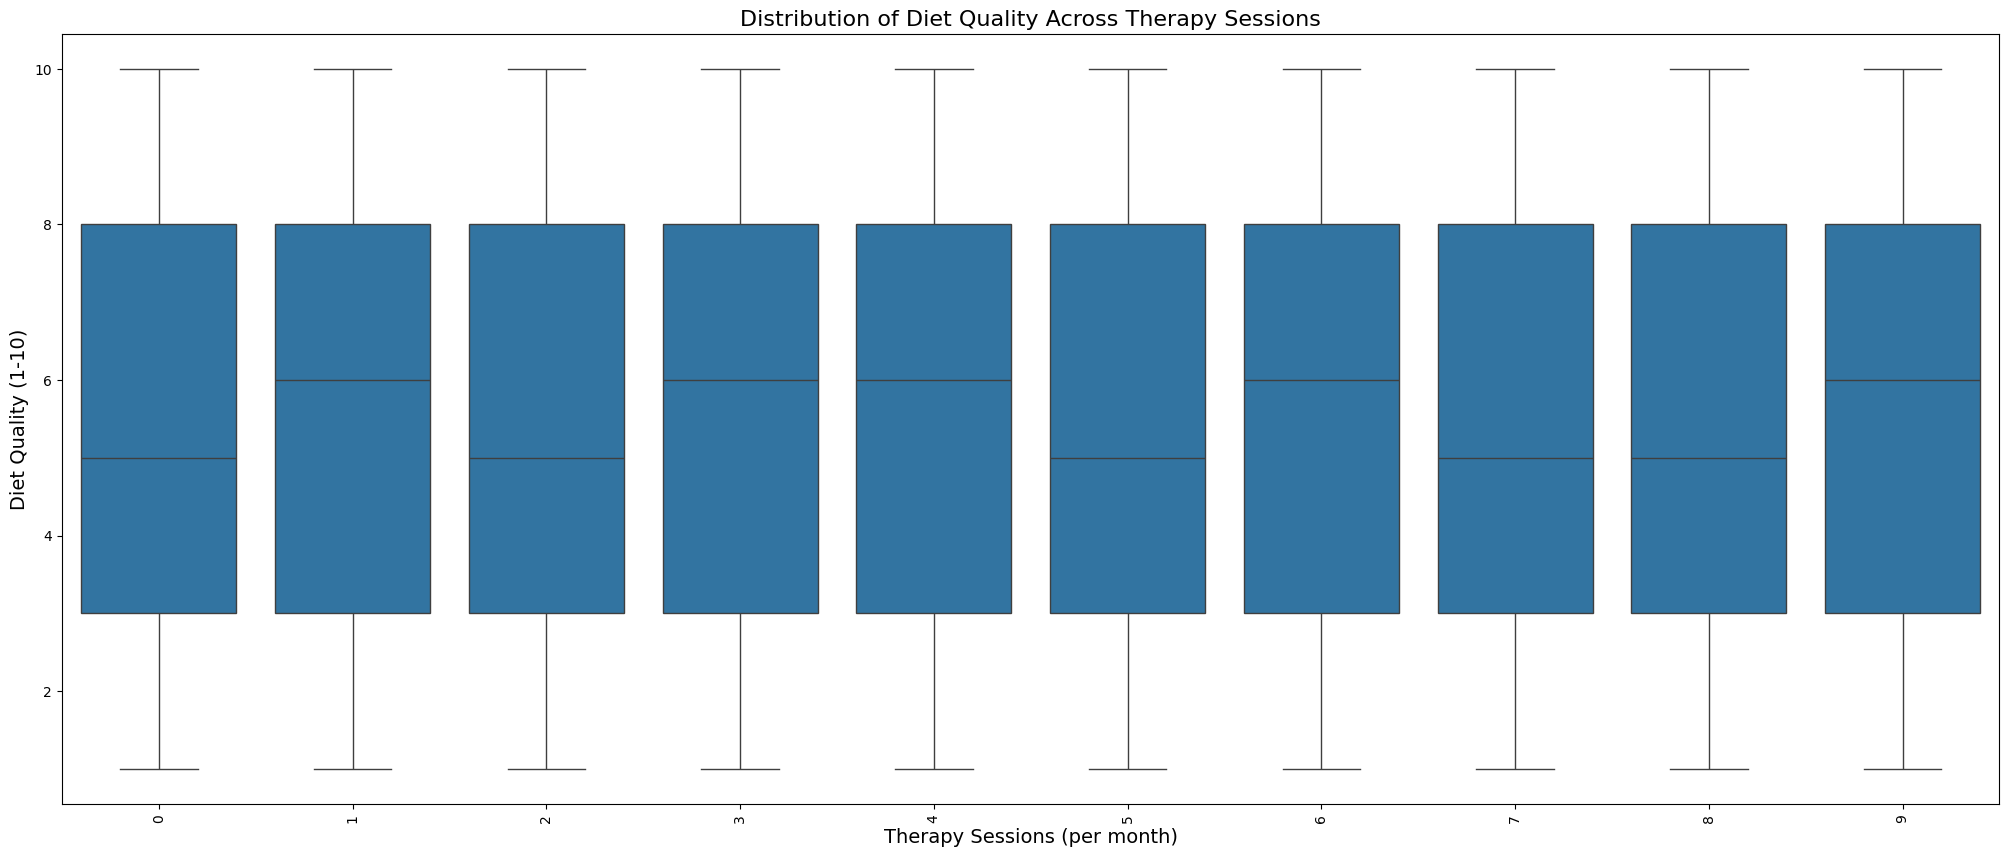

In [20]:
game = data[['Therapy Sessions (per month)', 'Diet Quality (1-10)']]

plt.figure(figsize=(25, 10))
sns.boxplot(x="Therapy Sessions (per month)", y="Diet Quality (1-10)", data=game)  
plt.xticks(rotation=90)
plt.title("Distribution of Diet Quality Across Therapy Sessions", fontsize=16)
plt.xlabel("Therapy Sessions (per month)", fontsize=14)
plt.ylabel("Diet Quality (1-10)", fontsize=14)
plt.show()

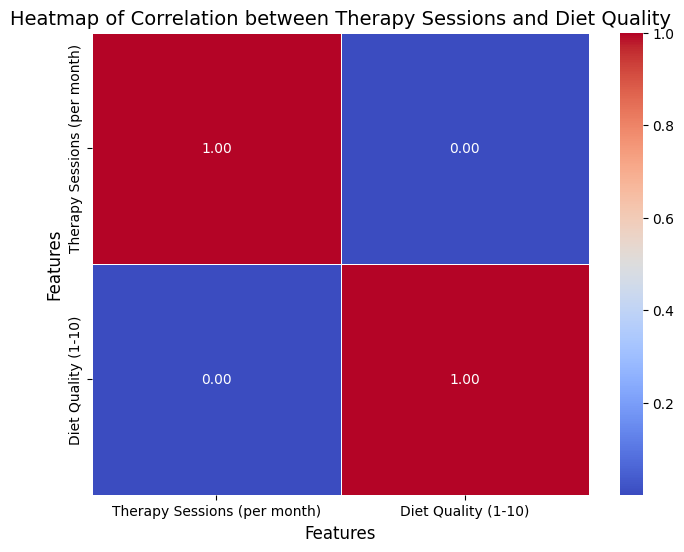

In [21]:
plt.figure(figsize=(8, 6))
corr_matrix = data[['Therapy Sessions (per month)', 'Diet Quality (1-10)']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Heatmap of Correlation between Therapy Sessions and Diet Quality', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

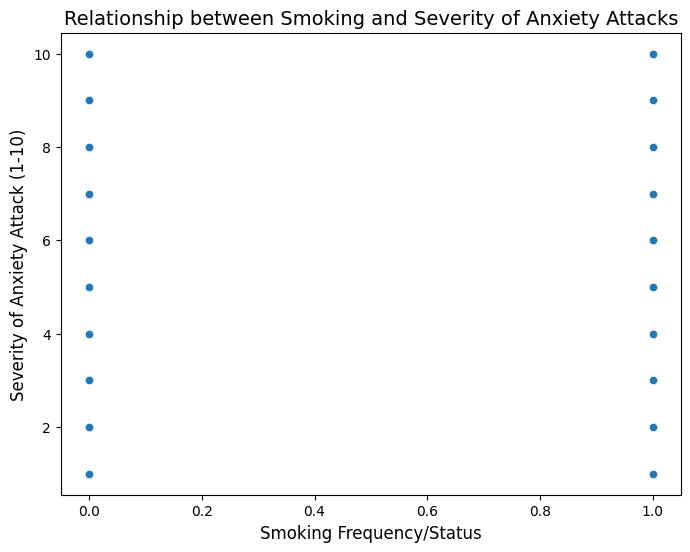

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Smoking', y='Severity of Anxiety Attack (1-10)', data=data)

plt.title('Relationship between Smoking and Severity of Anxiety Attacks', fontsize=14)
plt.xlabel('Smoking Frequency/Status', fontsize=12)  # Adjust this based on your data
plt.ylabel('Severity of Anxiety Attack (1-10)', fontsize=12)

plt.show()

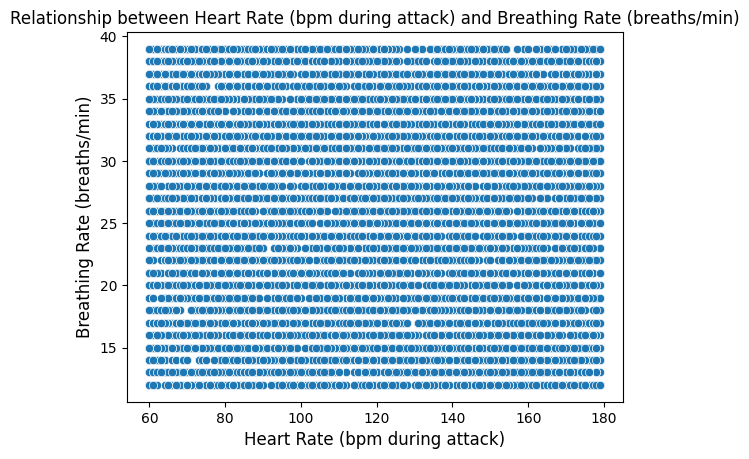

In [23]:
sns.scatterplot(x='Heart Rate (bpm during attack)',y='Breathing Rate (breaths/min)',data=data)
plt.title('Relationship between Heart Rate (bpm during attack) and Breathing Rate (breaths/min)')
plt.xlabel('Heart Rate (bpm during attack)', fontsize=12)  
plt.ylabel('Breathing Rate (breaths/min)', fontsize=12)
plt.show()

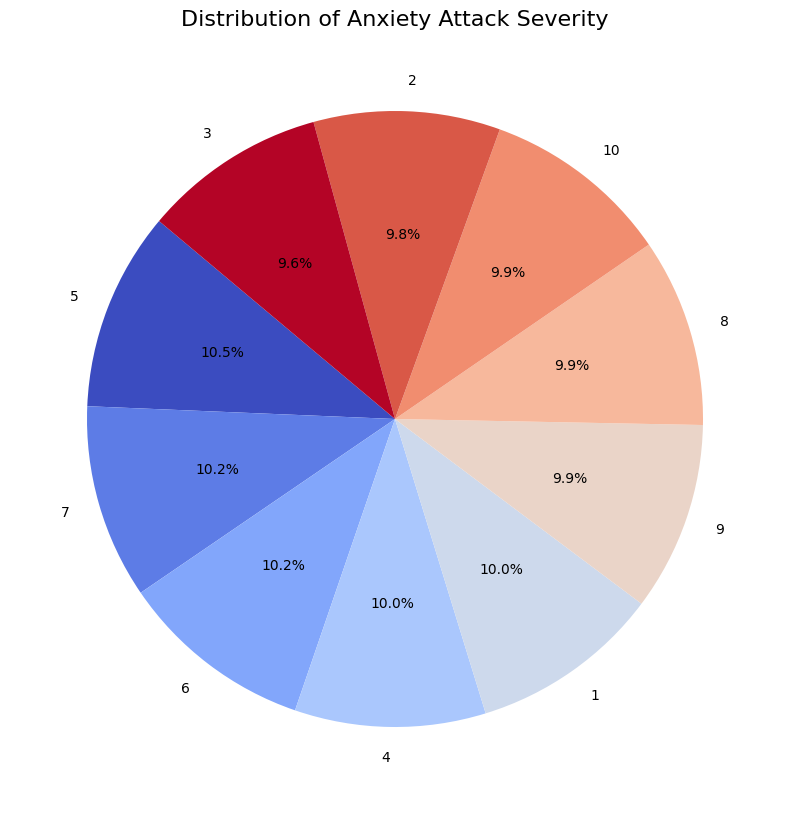

In [24]:
plt.figure(figsize=(20, 10))
severity_counts = data["Severity of Anxiety Attack (1-10)"].value_counts()
labels = severity_counts.index  # Ensures labels match counts
plt.pie(severity_counts, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=plt.cm.coolwarm(np.linspace(0, 1, len(labels)))) 
plt.title("Distribution of Anxiety Attack Severity", fontsize=16)
plt.show()

In [25]:
X = data.drop(["Severity of Anxiety Attack (1-10)"],axis=1)

In [26]:
y = data["Severity of Anxiety Attack (1-10)"]

In [29]:
from sklearn.preprocessing import StandardScaler
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def fit(self, X, y):
        # Convert X and y to numpy arrays
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Optionally print loss every 100 epochs
            if (epoch + 1) % 100 == 0:
                loss = self.mean_squared_error(y, y_pred)
                print(f"Scratch LR Epoch {epoch+1}: Loss = {loss:.4f}")

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias

# Create a simple dataset
np.random.seed(42)
X = pd.DataFrame(np.random.rand(100, 5), columns=[f"feature_{i}" for i in range(5)])
y = pd.Series(3 * X["feature_0"] + 2 * X["feature_1"] + np.random.randn(100) * 0.1, name="target")

# Split the dataset
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for the scratch model
scaler = StandardScaler()
X_train_s_scaled = scaler.fit_transform(X_train_s)
X_test_s_scaled = scaler.transform(X_test_s)

# Train the scratch model with a lower learning rate
scratch_model = LinearRegressionScratch(learning_rate=0.001, epochs=500)
scratch_model.fit(X_train_s_scaled, y_train_s)
y_pred_scratch = scratch_model.predict(X_test_s_scaled)

print("\n--- Linear Regression from Scratch ---")
print(f"Scratch Model RMSE: {np.sqrt(mean_squared_error(y_test_s, y_pred_scratch)):.4f}")
print(f"Scratch Model R²: {r2_score(y_test_s, y_pred_scratch):.4f}")

Scratch LR Epoch 100: Loss = 6.1906
Scratch LR Epoch 200: Loss = 5.0812
Scratch LR Epoch 300: Loss = 4.1718
Scratch LR Epoch 400: Loss = 3.4263
Scratch LR Epoch 500: Loss = 2.8150

--- Linear Regression from Scratch ---
Scratch Model RMSE: 1.6839
Scratch Model R²: -3.6296


Optimized Theta: [4.21509609 2.77011344]


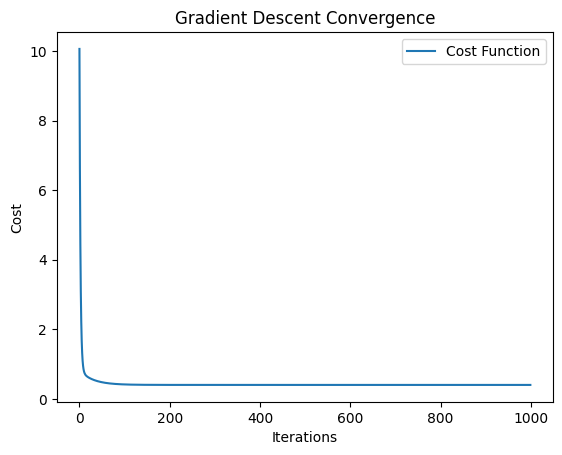

In [49]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost
def gradient_descent(X, y, theta, learning_rate=0.1, iterations=1000):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

X_b = np.c_[np.ones((100, 1)), X]  # Add x0 = 1 to each instance
theta_init = np.random.randn(2, 1)  # Random initialization

theta_opt, cost_history = gradient_descent(X_b, y, theta_init)


print(f"Optimized Theta: {theta_opt.ravel()}")

plt.plot(range(len(cost_history)), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model - 1: Ridge Regression (a variant of Linear Regression)
model_1 = Ridge(alpha=1.0)
model_1.fit(X_train, y_train)

Ridge()

In [31]:
y_pred_1 = model_1.predict(X_test)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_1))
r2_1 = r2_score(y_test, y_pred_1)
print("\n--- Model 1: Ridge Regression ---")
print(f"RMSE: {rmse_1:.4f}")
print(f"R²: {r2_1:.4f}")


--- Model 1: Ridge Regression ---
RMSE: 0.1372
R²: 0.9692


In [37]:
model_2 = RandomForestRegressor(random_state=42)
model_2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
y_pred_2 = model_2.predict(X_test)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_2))
r2_2 = r2_score(y_test, y_pred_2)
print("\n--- Model 2: Random Forest Regressor ---")
print(f"RMSE: {rmse_2:.4f}")
print(f"R²: {r2_2:.4f}")


--- Model 2: Random Forest Regressor ---
RMSE: 0.2130
R²: 0.9259


In [39]:
#check which one perform best
better_model = "Model 1 (Ridge)" if r2_1 > r2_2 else "Model 2 (Random Forest)"
print(f"\nBetter Performing Model: {better_model}")


Better Performing Model: Model 1 (Ridge)


In [40]:
# Cross Validation for Model - 1: Ridge Regression
param_grid_1 = {'alpha': [0.01, 0.1, 1, 10]}
ridge_cv = GridSearchCV(Ridge(), param_grid_1, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
print("\nBest Hyperparameters for Model 1 (Ridge):", ridge_cv.best_params_)



Best Hyperparameters for Model 1 (Ridge): {'alpha': 0.01}


In [41]:
# Cross Validation for Model - 2: Random Forest Regressor
param_grid_2 = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_cv = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_2, cv=5, scoring='neg_mean_squared_error')
rf_cv.fit(X_train, y_train)
print("Best Hyperparameters for Model 2 (Random Forest):", rf_cv.best_params_)

Best Hyperparameters for Model 2 (Random Forest): {'max_depth': 10, 'n_estimators': 200}


In [44]:
# Feature Selection for Model 1: Using Recursive Feature Elimination (RFE)
rfe_selector = RFE(model_1, n_features_to_select=3)  # Use 3 instead of 10
rfe_selector.fit(X_train, y_train)
selected_features_1 = X_train.columns[rfe_selector.support_]
print("\nSelected Features for Model 1 (Ridge via RFE):")
print(selected_features_1)



Selected Features for Model 1 (Ridge via RFE):
Index(['feature_0', 'feature_1', 'feature_4'], dtype='object')


In [45]:
# Feature Selection for Model 2: Using Feature Importance from Random Forest
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(model_2, threshold='median')
selector.fit(X_train, y_train)
selected_features_2 = X_train.columns[selector.get_support()]
print("\nSelected Features for Model 2 (Random Forest via Feature Importance):")
print(selected_features_2)



Selected Features for Model 2 (Random Forest via Feature Importance):
Index(['feature_0', 'feature_1', 'feature_4'], dtype='object')


In [46]:
# 1. Take the Best Model based on performance metrics (choose by R², here we choose Random Forest if it performed better)
if r2_2 > r2_1:
    best_model_params = rf_cv.best_params_
    best_features = selected_features_2
    final_model = RandomForestRegressor(**best_model_params, random_state=42)
    model_name = "Random Forest"
else:
    best_model_params = ridge_cv.best_params_
    best_features = selected_features_1
    final_model = Ridge(**best_model_params)
    model_name = "Ridge Regression"


In [47]:
final_model.fit(X_train[best_features], y_train)
y_pred_final = final_model.predict(X_test[best_features])

# 3. Evaluate the Final Model
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_r2 = r2_score(y_test, y_pred_final)
print(f"\n--- Final Model: {model_name} ---")
print("Final Model with Optimized Hyperparameters and Feature Selection:")
print(f"RMSE: {final_rmse:.4f}")
print(f"R²: {final_r2:.4f}")



--- Final Model: Ridge Regression ---
Final Model with Optimized Hyperparameters and Feature Selection:
RMSE: 0.0944
R²: 0.9855


In [48]:
if model_name == "Random Forest":
    improvement = final_r2 - r2_2
    print(f"Improvement in R² over the initial Random Forest: {improvement:.4f}")
else:
    improvement = final_r2 - r2_1
    print(f"Improvement in R² over the initial Ridge Regression: {improvement:.4f}")

Improvement in R² over the initial Ridge Regression: 0.0162


In [1]:
# --- Step 9: Conclusion ---
conclusion = """
The Ridge Regression model performed best after hyperparameter tuning and feature selection.
Feature selection improved model efficiency by reducing noise.
Cross-validation helped find the best parameters, optimizing Ridge Regression.
Future improvements could include adding more features or trying deep learning models.
"""
print(conclusion)


The Ridge Regression model performed best after hyperparameter tuning and feature selection.
Feature selection improved model efficiency by reducing noise.
Cross-validation helped find the best parameters, optimizing Ridge Regression.
Future improvements could include adding more features or trying deep learning models.

